In [ ]:
import pandas as pd

In [ ]:
# Load CSV file into a DataFrame
df = pd.read_csv('../data/cleaveland.csv')

# Print the first few rows of the DataFrame to check if it loaded correctly
print(df.head(10))

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
columns = list(df.columns)

In [ ]:
missing_cols = []

for column in columns:

    try :

        col = df[column]

        # Use isna() to check for missing values
        miss_val_count = col.value_counts()["?"]

        print(miss_val_count,"- missing values in column ",column)
        missing_cols.append(column)
    
    except : 
        continue

In [ ]:
missing_cols

In [ ]:
for column in missing_cols:

    mode = df[column].mode()[0]

    df[column] = df[column].replace('?', mode).astype('int64')

In [ ]:
df.describe()

In [ ]:
import matplotlib.pyplot as plt

for column in columns:
    x = df[column].values
    y = df['num'].values

    plt.scatter(x, y)
    plt.xlabel(column)
    plt.ylabel('target')
    plt.title('Scatter plot of '+column+' vs. target')
    plt.savefig(str('../scatter plots/'+column+' vs. target.jpg'))
    plt.show()

In [ ]:
for column in columns:

        x = df[column].values
        plt.boxplot(x,
                whiskerprops=dict(linestyle='-', linewidth=2, color='green'), 
                capprops=dict(linestyle='-', linewidth=2, color='red'), 
                medianprops=dict(linestyle='-', linewidth=2, color='black'), 
                flierprops=dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black'))
        plt.title('Box plot of '+column)
        plt.savefig(str('../box plots/'+column+'.jpg'))
        plt.show()


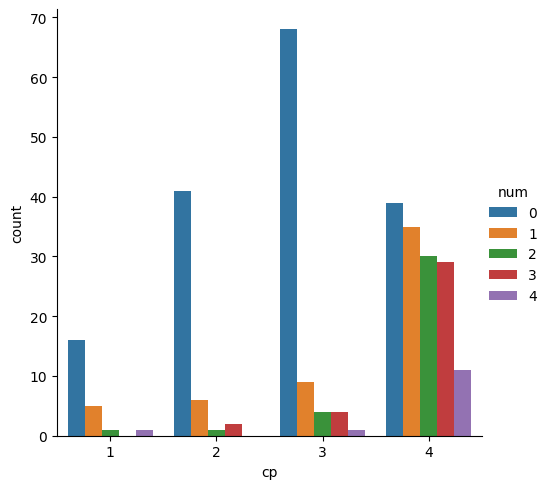

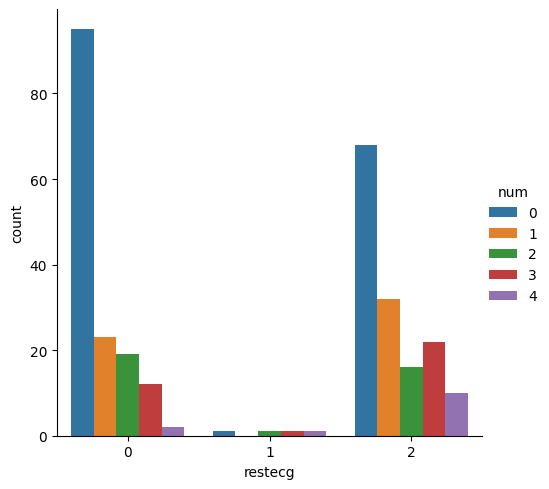

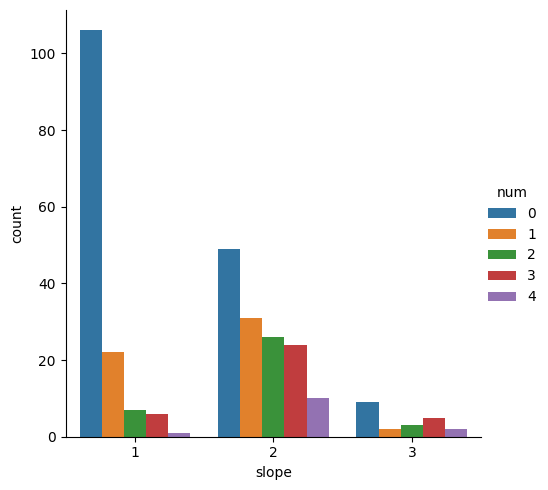

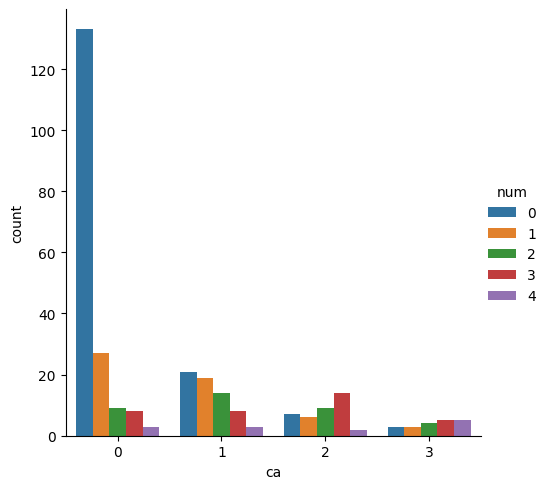

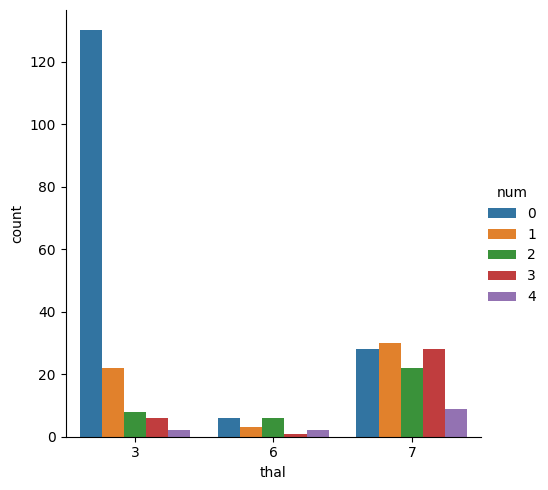

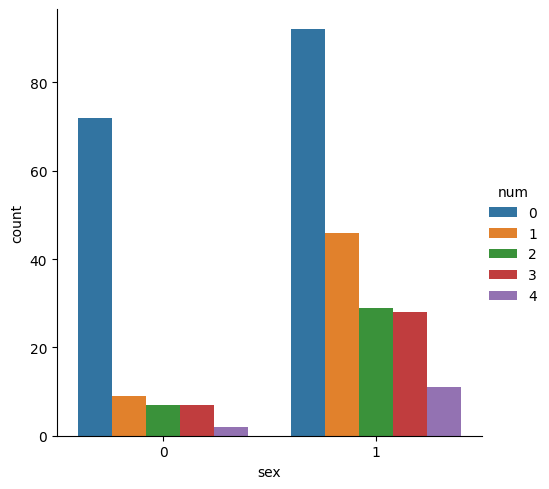

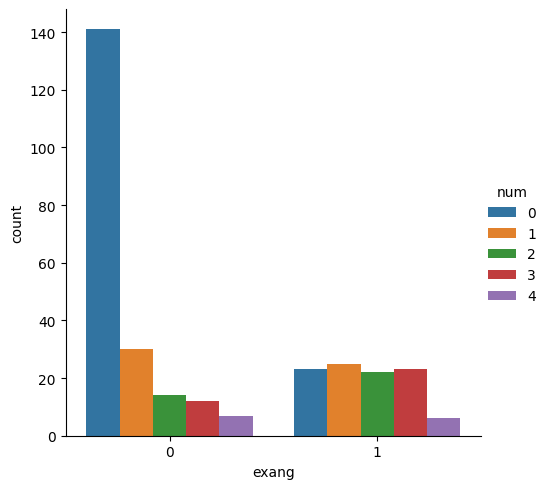

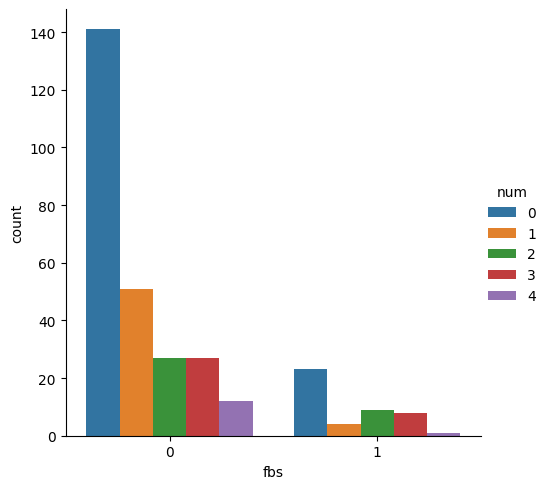

In [20]:
import seaborn as sns

asd = ["cp","restecg","slope","ca","thal","sex","exang","fbs"]

for column in asd:

    plot = sns.catplot(x=column, hue="num", kind="count", data=df)

    plot.savefig(str('../bar charts/'+column+'.jpg'))


In [ ]:

df_scaled = df.copy()

# Iterate over the columns of the DataFrame
for column in df.columns:
    # Find the minimum and maximum values of the column
    col_min = df[column].min()
    col_max = df[column].max()

    # Apply min-max scaling to the column
    df_scaled[column] = (df[column] - col_min) / (col_max - col_min)

In [ ]:
df_scaled.head(10)

In [ ]:
df_scaled.describe()